<a href="https://colab.research.google.com/github/Decadent-tech/Uber-Case/blob/main/Uber_Analysis_Ride_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_style('whitegrid')

In [13]:
import pandas as pd
uberdata= pd.read_csv('uber-data.csv', dayfirst = True, na_values = 'NaN')
uberdata.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [9]:
uberdata.shape

(6745, 6)

In [10]:
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [14]:
uberdata['Request timestamp_1']= pd.to_datetime(uberdata['Request timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
uberdata['Request timestamp_2']=pd.to_datetime(uberdata['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
uberdata['Request timestamp']=uberdata['Request timestamp_2'].combine_first(uberdata['Request timestamp_1'])

In [15]:
uberdata.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request timestamp_1,Request timestamp_2
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00,NaT,2016-07-11 11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47,NaT,2016-07-11 17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58,NaT,2016-07-12 09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03,NaT,2016-07-12 21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,NaT


In [16]:
uberdata['Drop timestamp_1'] = pd.to_datetime(uberdata['Drop timestamp'], format='%d-%m-%Y %H:%M:%S', errors='coerce')
uberdata['Drop timestamp_2']=pd.to_datetime(uberdata['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
uberdata['Drop timestamp']=uberdata['Drop timestamp_2'].combine_first(uberdata['Drop timestamp_1'])

In [17]:
uberdata.drop(columns=['Drop timestamp_1', 'Drop timestamp_2',
                       'Request timestamp_1', 'Request timestamp_2'],
               inplace=True)

In [18]:
uberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [20]:
uberdata.duplicated().sum()

0

In [23]:
uberdata.isnull().sum()/len(uberdata)*100

,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


In [24]:
uberdata['RequestHoor']=uberdata['Request timestamp'].dt.hour

In [26]:
uberdata["TimeSlot"] = uberdata["RequestHoor"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))


In [27]:
uberdata['TimeSlot'].value_counts()

,count
TimeSlot,
Late Evening,2342
Early Morning,2103
Noon,1224
Dawn,578
Night,498


In [28]:
uberdata['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [29]:
uberdata['Cab Availability'] = uberdata['Status'].apply(lambda x: 'Available'
                                                        if x=='Trip Completed' else 'Not Available')

In [30]:
uberdata['Cab Availability'].value_counts()

,count
Cab Availability,
Not Available,3914
Available,2831


Text(0.5, 1.0, 'Frequency of Req by hour ')

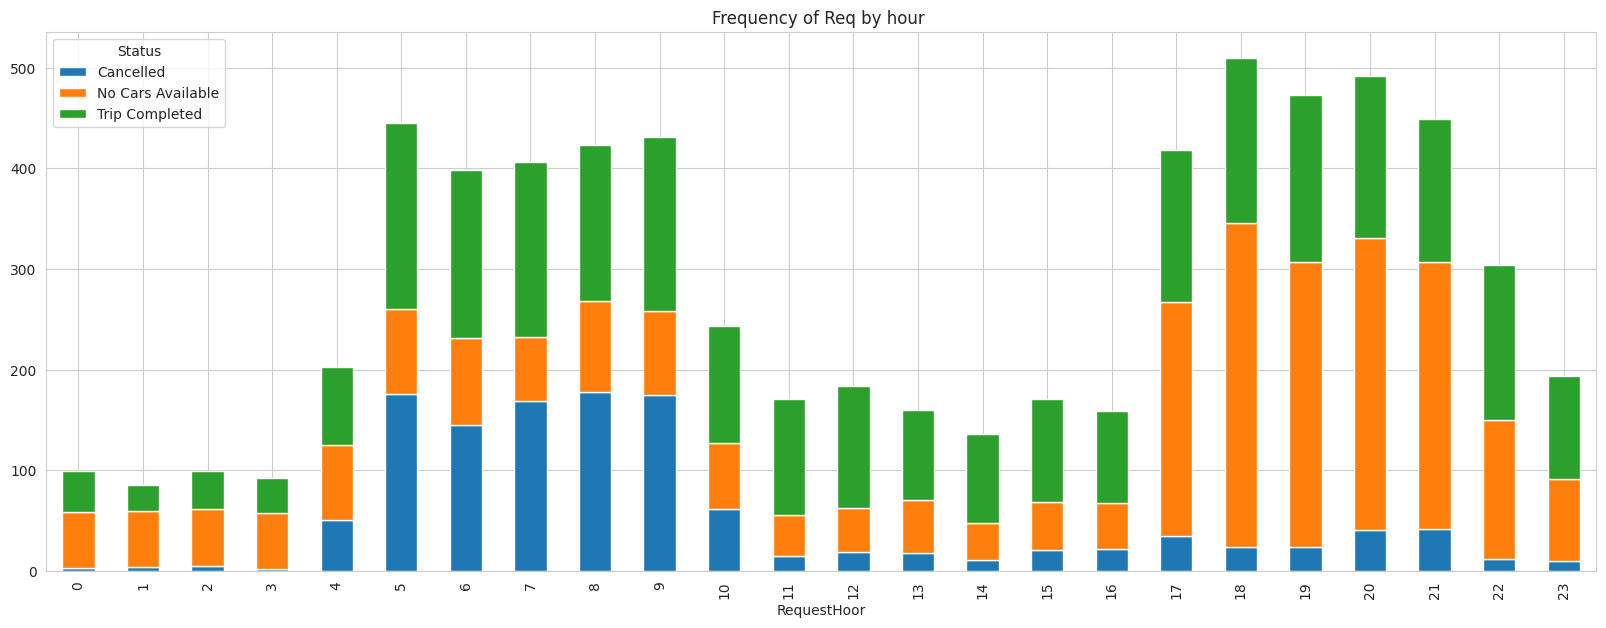

In [32]:
uberdata.groupby(['RequestHoor', 'Status']).size().unstack().plot(kind='bar',
                                                        stacked=True,figsize=(20,7))
plt.title("Frequency of Req by hour ")

#demands is increasing drivers are cancellingf more around 4-9 am
# from afternoon teh demands of cab is less
# demand is higher the cancellation is lowat night / evening



<Axes: >

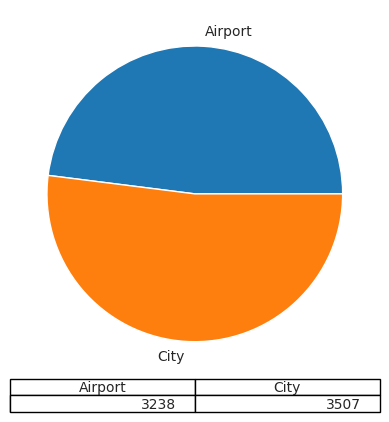

In [36]:
uberdata.groupby(['Pickup point']).size().plot(kind='pie',
                                                        stacked=True,table=True)

<Axes: >

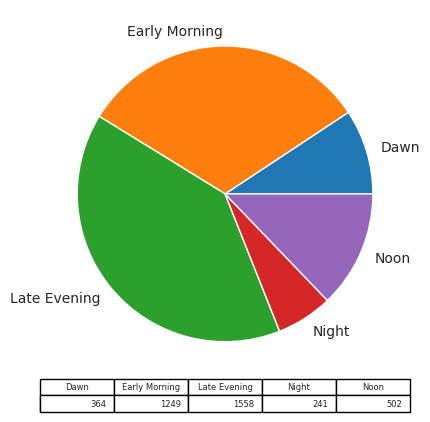

In [37]:
uberdata[uberdata['Cab Availability']=='Not Available'].groupby(['TimeSlot']).size().plot(kind ='pie', stacked = True, table = True)

Text(0.5, 1.0, 'Frequency of Req by hour at airport towards the city')

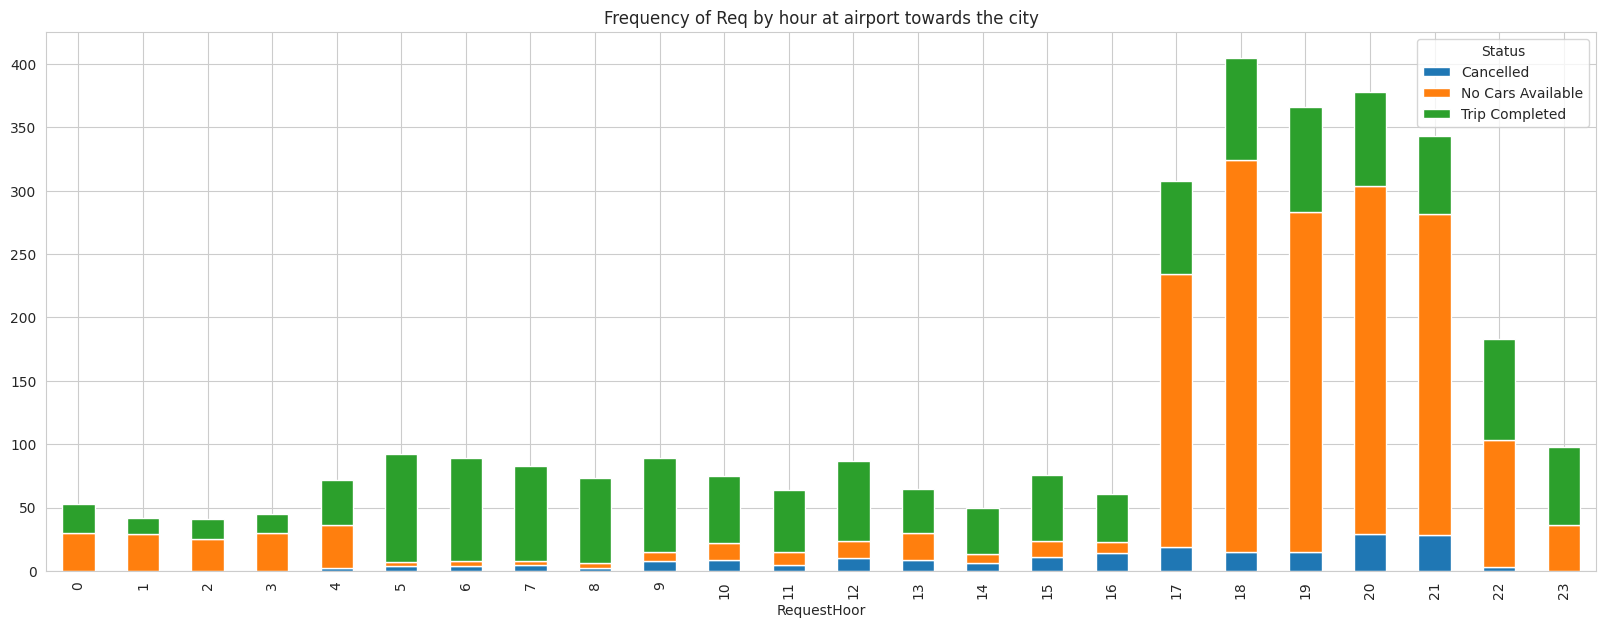

In [38]:
uberdata[uberdata['Pickup point']=='Airport'].groupby(['RequestHoor', 'Status']).size().unstack().plot(kind='bar',
                                                        stacked=True,figsize=(20,7))
plt.title("Frequency of Req by hour at airport towards the city")

Eveneing supply is more so no cabs available

Text(0.5, 1.0, 'Frequency of Req by hour at City towards the Airport')

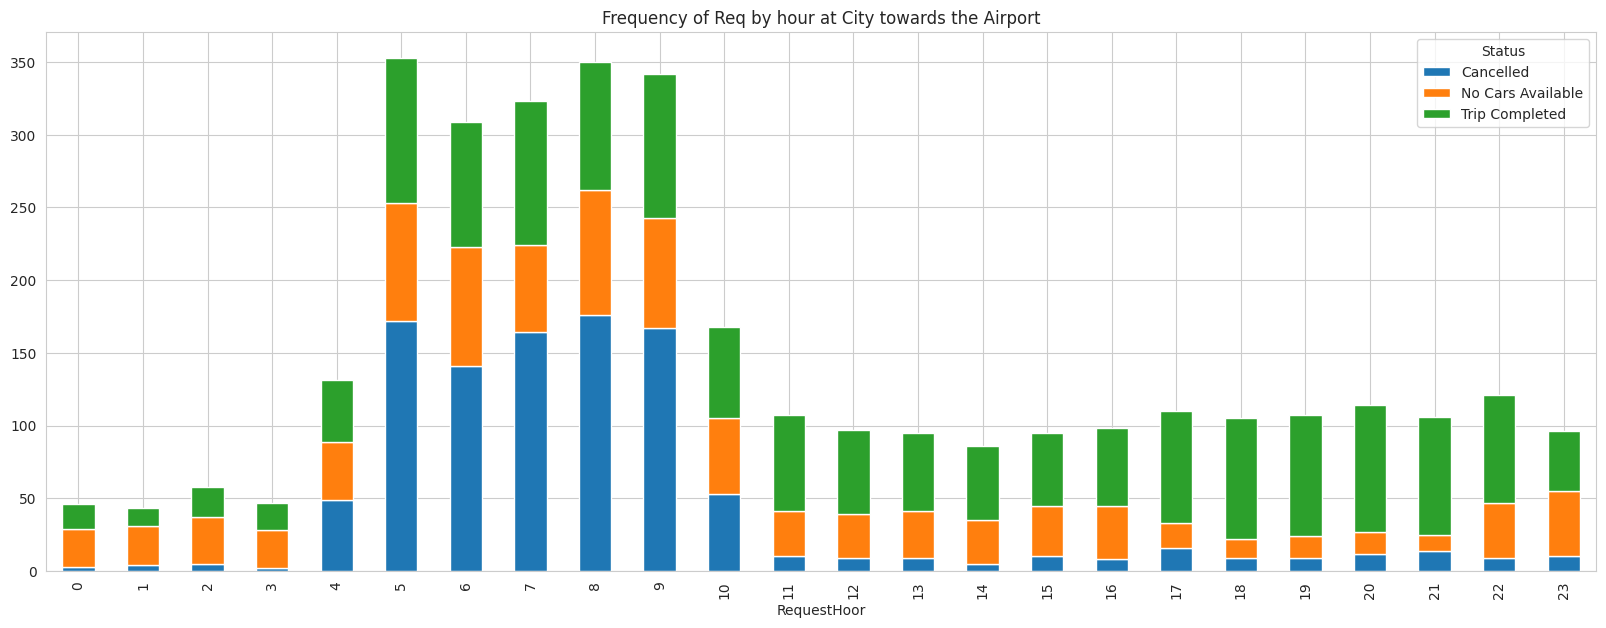

In [39]:
uberdata[uberdata['Pickup point']=='City'].groupby(['RequestHoor', 'Status']).size().unstack().plot(kind='bar',
                                                        stacked=True,figsize=(20,7))
plt.title("Frequency of Req by hour at City towards the Airport")